In [92]:
# Initialising required libraries
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from datetime import datetime
from sklearn import metrics

In [93]:
df_Inflation = pd.read_csv("PCDA_UNCLEANED/inflation_uk.csv")
df_Inflation

,DATE,Inflation rate
0,3/31/1989,0.14868
1,6/30/1989,0.15832
2,9/30/1989,0.15350
3,12/31/1989,0.16512
4,3/31/1990,0.17514
...,...,...
131,12/31/2021,0.14722
132,3/31/2022,0.18656
133,6/30/2022,0.27506
134,9/30/2022,0.19971


In [94]:
df_Inflation=df_Inflation.dropna()
df_Inflation
df_Inflation['DATE'] = pd.to_datetime(df_Inflation['DATE'])

C:\Users\Students\AppData\Local\Temp\ipykernel_10972\1853795270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Inflation['DATE'] = pd.to_datetime(df_Inflation['DATE'])


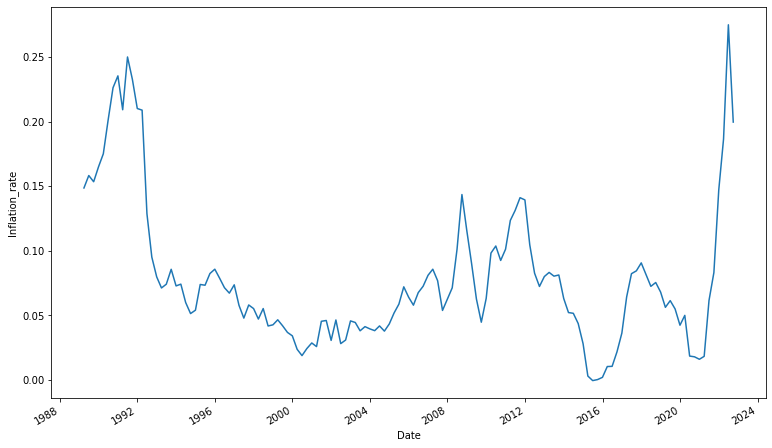

In [95]:
plt.plot(df_Inflation['DATE'], df_Inflation['Inflation rate'])
plt.xticks(rotation=30, ha='right')
plt.ylabel("Inflation_rate")
plt.xlabel("Date")
plt.rcParams['figure.figsize']=(12.8,7.2)

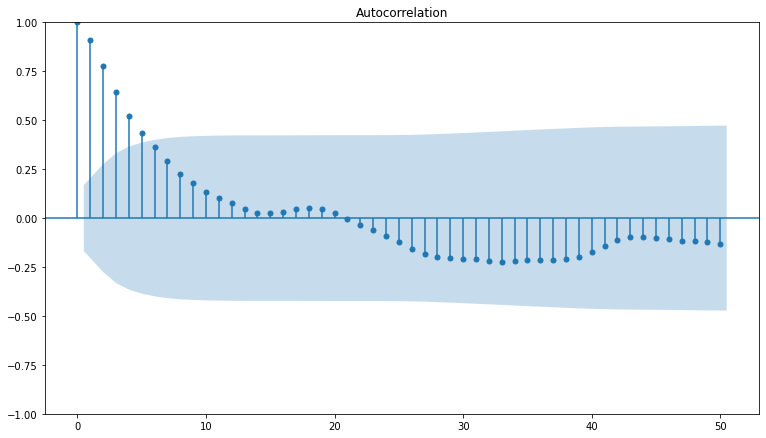

In [96]:
from statsmodels.graphics.tsaplots import plot_acf
acf_plot = plot_acf(df_Inflation['Inflation rate'],lags=50)

### According to the ACF plot, the autocorrelations are not declining quickly toward zero which indicates a trend component. As this is quarterly data and there are no significant spikes at every 4th lag, there is no seasonal component

### Due the pressence of Trend component, we can fit the data with below models
    1. Holt's linear Exponential 
    2. Damped trend Exponential
    3. Simple Linear Regression
    4. ARIMA
  
### As there is lot of flucation in this model we will aslo try with Holt's winter model

In [97]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.api import Holt,ExponentialSmoothing

# Split the data in to test and Train

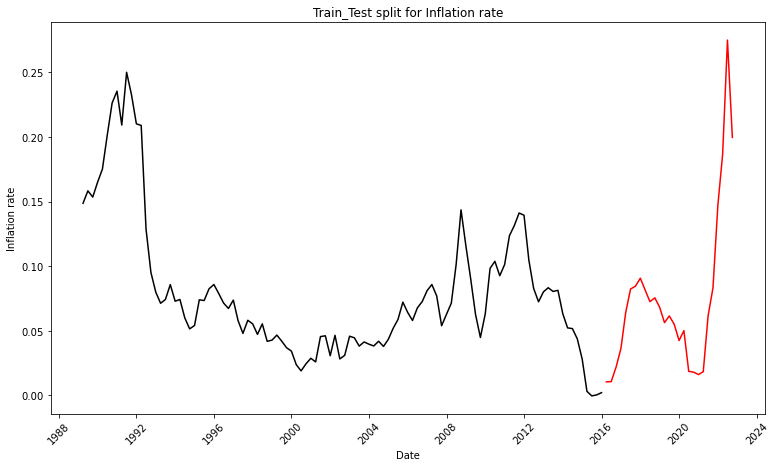

In [98]:
x1 = df_Inflation.loc[:, df_Inflation.columns == 'DATE'].to_numpy()
y1 = df_Inflation.loc[:, df_Inflation.columns == 'Inflation rate'].to_numpy()
x1_train, x1_test,y1_train, y1_test = train_test_split(x1,y1, test_size=0.20, shuffle=False)
x1_train
plt.plot(x1_train,y1_train, color = "black")
plt.plot(x1_test,y1_test, color = "red")
plt.ylabel('Inflation rate')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.title("Train_Test split for Inflation rate")
plt.rcParams['figure.figsize']=(12.8,7.2)
plt.show()

## Holt's linear Exponential model

In [99]:
def holt(x1,y1,y1_train,y1_test, period,x1_train,x1_test):
    plt1 = plt.plot(x1,y1,color='black')
    fit1 = Holt(y1_train).fit()
    fcast1 = fit1.forecast(period)
    #mse1_fit = ((fit1.fittedvalues - y1_train.squeeze()) ** 2).mean()
    #mse1_acc = ((fcast1 - y1_test.squeeze()) ** 2).mean()
    MAPE_fit= metrics.mean_absolute_percentage_error(y1_train, fit1.fittedvalues)
    MAPE_acc = metrics.mean_absolute_percentage_error(y1_test, fcast1)
    print('The MAPE for Model fit is',MAPE_fit)
    print('The MAPE for Model Acc is ',MAPE_acc)
    #print('The Root Mean Squared Error of Model fit is {}'.format(round(np.sqrt(mse1_fit), 2)))
    #print('The Root Mean Squared Error of Model accuracy is {}'.format(round(np.sqrt(mse1_acc), 2)))
    plt2 = plt.plot(x1_train,fit1.fittedvalues, color='blue')
    plt3 = plt.plot(x1_test,fcast1,color='red', marker="o")
    ax = plt.gca()
    print(fit1.summary())
    ax.legend([plt1[0],plt2[0],plt3[0]],["Actual","Holt's fit","Holt's Predict"])
    plt.xticks(rotation=30, ha='right')
    plt.title("Holt’s Linear Smoothing")
    plt.show()

The MAPE for Model fit is 0.35111104527911363
The MAPE for Model Acc is  1.3745428820744439
                              Holt Model Results                              
Dep. Variable:                  endog   No. Observations:                  108
Model:                           Holt   SSE                              0.029
Optimized:                       True   AIC                           -881.084
Trend:                       Additive   BIC                           -870.356
Seasonal:                        None   AICC                          -880.253
Seasonal Periods:                None   Date:                 Mon, 12 Dec 2022
Box-Cox:                        False   Time:                         22:06:03
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            1.0000000   

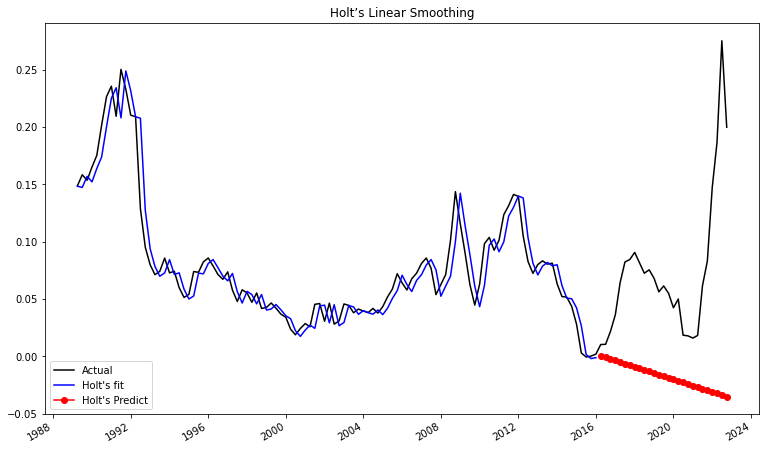

In [100]:
holt(x1,y1, y1_train,y1_test,len(x1_test),x1_train,x1_test)

### The level smoothing parameter is "1.0" which indicates that a higher weight is assigned to the most recent observations.
### The trend smoothing parameter of "0.00" indicates that the slope of the time series is not changing
### The MAPE for Model Acc is "1.37", which indicate model peformance is good, but there are chances of overfitting of data.

# Damped Trend Exponential

In [101]:
def damped(x1,y1,y1_train,y1_test, period,x1_train,x1_test):
    plt1 = plt.plot(x1,y1,color='black')
    fit1 = ExponentialSmoothing(y1_train,trend='add',seasonal=None, damped_trend=True).fit()
    fcast1 = fit1.forecast(period)
   # mse1_fit = ((fit1.fittedvalues - y1_train.squeeze()) ** 2).mean()
   # mse1_acc = ((fcast1 - y1_test.squeeze()) ** 2).mean()
    MAPE_fit= metrics.mean_absolute_percentage_error(y1_train, fit1.fittedvalues)
    MAPE_acc = metrics.mean_absolute_percentage_error(y1_test, fcast1)
    print("The MAPE for Model fit is {}",MAPE_fit)
    print("The MAPE for Model Acc is {}",MAPE_acc)
    #print('The Root Mean Squared Error of Model fit is {}'.format(round(np.sqrt(mse1_fit), 2)))
    #print('The Root Mean Squared Error of Model accuracy is {}'.format(round(np.sqrt(mse1_acc), 2)))
    plt2 = plt.plot(x1_train,fit1.fittedvalues, color='blue')
    plt3 = plt.plot(x1_test,fcast1,color='red', marker="o")
    print(fit1.summary())
    ax = plt.gca()
    ax.legend([plt1[0],plt2[0],plt3[0]],["Actual","Damped fit","Damped Predict"])
    plt.xticks(rotation=30, ha='right')
    plt.title("Damped Exponential Smoothing")
    plt.show()

The MAPE for Model fit is {} 0.41144931963964915
The MAPE for Model Acc is {} 1.1020287071199524
                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  108
Model:             ExponentialSmoothing   SSE                              0.028
Optimized:                         True   AIC                           -880.840
Trend:                         Additive   BIC                           -867.429
Seasonal:                          None   AICC                          -879.720
Seasonal Periods:                  None   Date:                 Mon, 12 Dec 2022
Box-Cox:                          False   Time:                         22:06:04
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level 

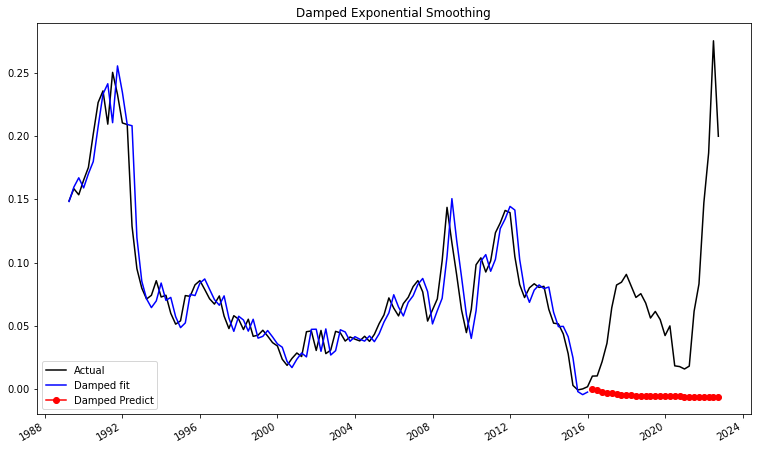

In [102]:
damped(x1,y1, y1_train,y1_test,len(x1_test),x1_train,x1_test)

### The level smoothing parameter is "1.0" which indicates that a higher weight is assigned to the most recent observations.
### The trend smoothing parameter of "0.31" indicates that the slope of the time series is hardly changing.
### The damping smoothing parameter is "0.80" which indicates that good damping is applied
### The MAPE for Model Acc is 1.10, which indicate model peformance is good, but there are chances of overfitting.

# Simple Linear Regression

In [103]:
# Importing Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [104]:
df_Inflation['DateIndex'] = np.arange(len(df_Inflation.index))
X = df_Inflation.loc[:, df_Inflation.columns == 'DateIndex']
y = df_Inflation.loc[:, df_Inflation.columns == 'Inflation rate']

X = np.array(X).reshape((-1, 1))
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.20, shuffle=False)
X_test
X_test = np.array(X_test).reshape((-1, 1))

C:\Users\Students\AppData\Local\Temp\ipykernel_10972\3245276707.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Inflation['DateIndex'] = np.arange(len(df_Inflation.index))


In [105]:
# fit the regression model
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:         Inflation rate   R-squared (uncentered):                   0.353
Model:                            OLS   Adj. R-squared (uncentered):              0.347
Method:                 Least Squares   F-statistic:                              58.50
Date:                Mon, 12 Dec 2022   Prob (F-statistic):                    9.37e-12
Time:                        22:06:04   Log-Likelihood:                          123.66
No. Observations:                 108   AIC:                                     -245.3
Df Residuals:                     107   BIC:                                     -242.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0009      0.000      7.648      0.000       0.001       0.001
==============================================================================
Omnibus:                       28.158   Durbin-Watson:                   0.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.381
Skew:                           1.286   Prob(JB):                     1.70e-09
Kurtosis:                       4.537   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [106]:
y_pred = model.predict(X_test)
y_pred

array([0.09930445, 0.10022394, 0.10114343, 0.10206291, 0.1029824 ,
       0.10390188, 0.10482137, 0.10574085, 0.10666034, 0.10757983,
       0.10849931, 0.1094188 , 0.11033828, 0.11125777, 0.11217725,
       0.11309674, 0.11401623, 0.11493571, 0.1158552 , 0.11677468,
       0.11769417, 0.11861365, 0.11953314, 0.12045263, 0.12137211,
       0.1222916 , 0.12321108])

In [107]:
MAPE_train=metrics.mean_absolute_percentage_error(y_train, model.fittedvalues)
print("The MAPE for Model fit is",MAPE_train)
MAPE_test=metrics.mean_absolute_percentage_error(y_test, y_pred)
print("The MAPE for Model Acc is",MAPE_test)

The MAPE for Model fit is 6.096392957177507
The MAPE for Model Acc is 2.097326623444105


In [108]:
y_train = np.array(y_train).reshape((-1, 1))

In [109]:
model.fittedvalues = np.array(model.fittedvalues).reshape((-1, 1))

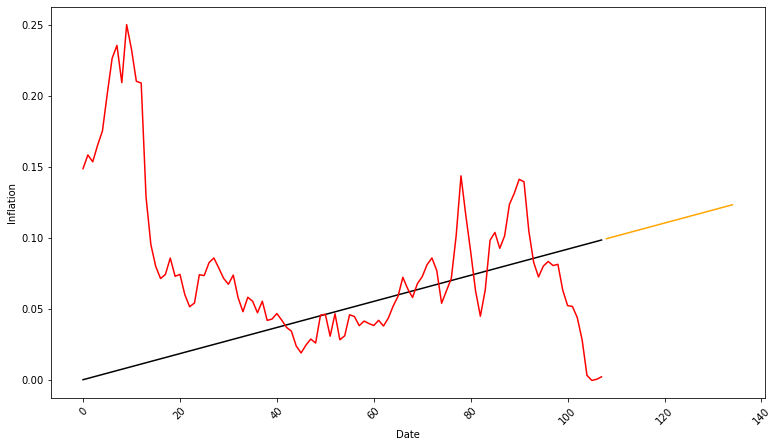

In [110]:
plt.plot(X_train,model.fittedvalues, color = "black")
plt.plot(X_train,y_train, color = "red")
plt.plot(X_test,y_pred, color = "Orange")
plt.ylabel('Inflation')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.rcParams['figure.figsize']=(12.8,7.2)
plt.show()

# Model Assumptions

## 1.	First, we assume that the relationship between the forecast variable and the predictor variable is linear

### The relationship between the forecast variable “GDP” and the predictor variable is linear.

## 2.Second, we make the following assumptions about the errors:     
        * Residuals are normally distributed
        * Residuals have constant variance 
        * Residual terms are independent

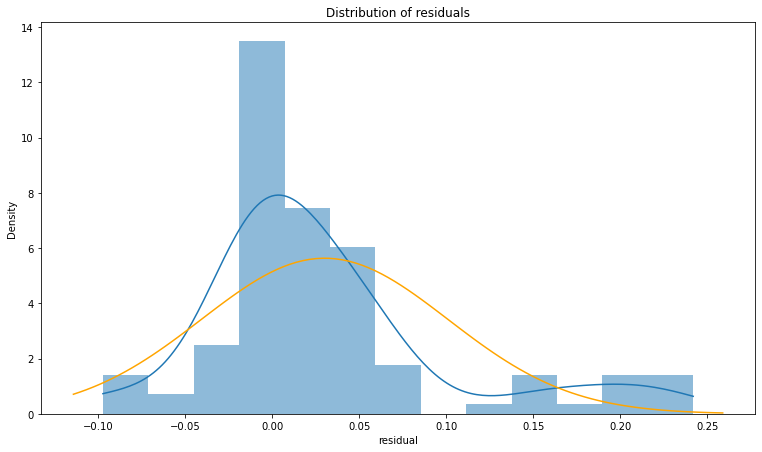

In [111]:
from scipy import stats
mu, std = stats.norm.fit(model.resid)
mu, std
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, ax = plt.subplots()
# plot the residuals
sns.histplot(x=model.resid, ax=ax, stat="density", linewidth=0, kde=True)
ax.set(title="Distribution of residuals", xlabel="residual")

# plot corresponding normal curve
xmin, xmax = plt.xlim() # the maximum x values from the histogram above
x = np.linspace(xmin, xmax, 100) # generate some x values
p = stats.norm.pdf(x, mu, std) # calculate the y values for the normal curve
sns.lineplot(x=x, y=p, color="orange", ax=ax)
plt.show()

## According to the histogram, the residuals appear not normally distributed, The assumption is not true

[Text(0.5, 0, 'Residuals'), Text(0, 0.5, 'Predicted Values')]

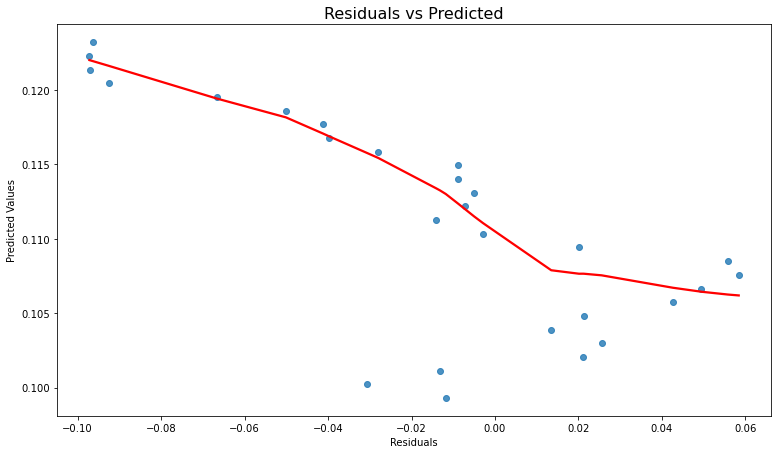

In [112]:
pred_resid = model.resid.tail(len(y_pred))

#Residual Vs Predicted Plot
fig, ax = plt.subplots(1,1)

sns.regplot(x=pred_resid, y=y_pred, lowess=True, ax=ax, line_kws={'color': 'red'})
ax.set_title('Residuals vs Predicted', fontsize=16)
ax.set(xlabel='Residuals', ylabel='Predicted Values')

## The residual vs. predicted value scatterplot shows a pattern that indicates that the equal variances assumption is not correct.

In [113]:
#perform Durbin-Watson test
from statsmodels.stats.stattools import durbin_watson

durbin_watson(model.resid)

0.045726156453744705

## As the Durbin-Watson statistic ranges from 0-4. The DW statistic close to zero indicate that there is positive serial correlation

# Model Evaluation
## 1.	Is the model logical? 
### The model is logical because the slope is positive which makes sense. With the increase in time there is increase in Inflation
## 2.	Is the slope term statistically significant? 
### The p-value for the slope term is less than alpha, so independent variable is a significant predictor
## 3.	What percent of the variation in the dependent variable is explained by variation in the independent variable 
### R2 = 35% so 35% of the variation in the dependent variable is explained by the independent variable

## ARIMA 

In [114]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [115]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.model_selection import train_test_split

In [116]:
df_Inflation.head()

,DATE,Inflation rate,DateIndex
0,1989-03-31,0.14868,0
1,1989-06-30,0.15832,1
2,1989-09-30,0.15350,2
3,1989-12-31,0.16512,3
4,1990-03-31,0.17514,4


### Check if the data is stationary using Dickey-Fuller test 

In [117]:
ad_fuller_result = adfuller(df_Inflation['Inflation rate'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.7118496412526922
p-value: 0.07201011375145606


### The p value is higher than alpha so we cannot reject null hypothesis and must assume the data is not stationary

### Differencing can be done to make the data stationary 

In [118]:
df_Inflation['Inflation_rate_diff'] = df_Inflation['Inflation rate'] - df_Inflation['Inflation rate'].shift(1)

C:\Users\Students\AppData\Local\Temp\ipykernel_10972\347718117.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Inflation['Inflation_rate_diff'] = df_Inflation['Inflation rate'] - df_Inflation['Inflation rate'].shift(1)


In [119]:
df_Inflation['Inflation_rate_diff'].head()

0        NaN
1    0.00964
2   -0.00482
3    0.01162
4    0.01002
Name: Inflation_rate_diff, dtype: float64

In [120]:
df_Inflation = df_Inflation.dropna()
df_Inflation

,DATE,Inflation rate,DateIndex,Inflation_rate_diff
1,1989-06-30,0.15832,1,0.00964
2,1989-09-30,0.15350,2,-0.00482
3,1989-12-31,0.16512,3,0.01162
4,1990-03-31,0.17514,4,0.01002
5,1990-06-30,0.20136,5,0.02622
...,...,...,...,...
130,2021-09-30,0.08317,130,0.02162
131,2021-12-31,0.14722,131,0.06405
132,2022-03-31,0.18656,132,0.03934
133,2022-06-30,0.27506,133,0.08850


### Check again if the differenced data is stationary 

In [121]:
ad_fuller_result = adfuller(df_Inflation['Inflation_rate_diff'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -5.15316270773654
p-value: 1.0949110931547735e-05


### The p value is lower than alpha so we can assume that the data is stationary 

<AxesSubplot:>

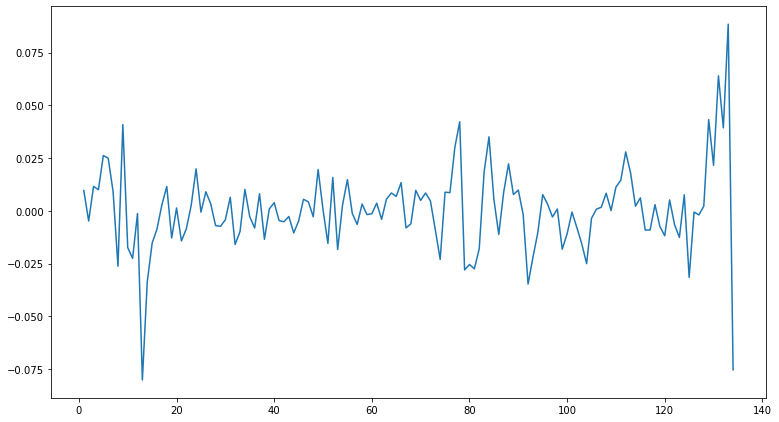

In [122]:
#viewing the stationary data 
df_Inflation['Inflation_rate_diff'].plot()

### Plotting ACF and PACF of differenced data to find which ARIMA model to choose 

C:\Users\Students\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


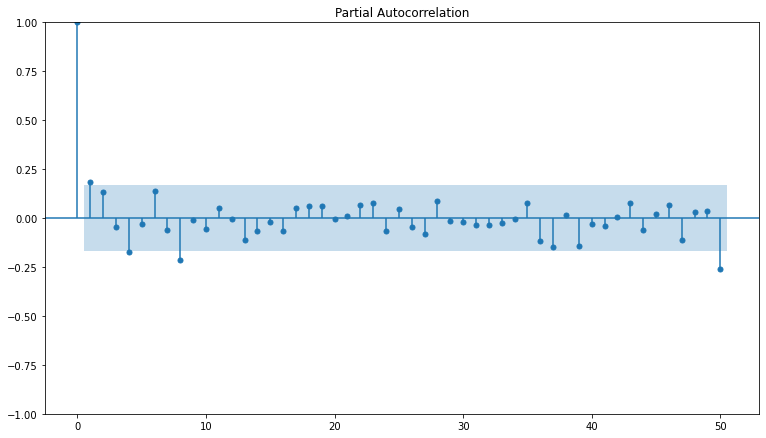

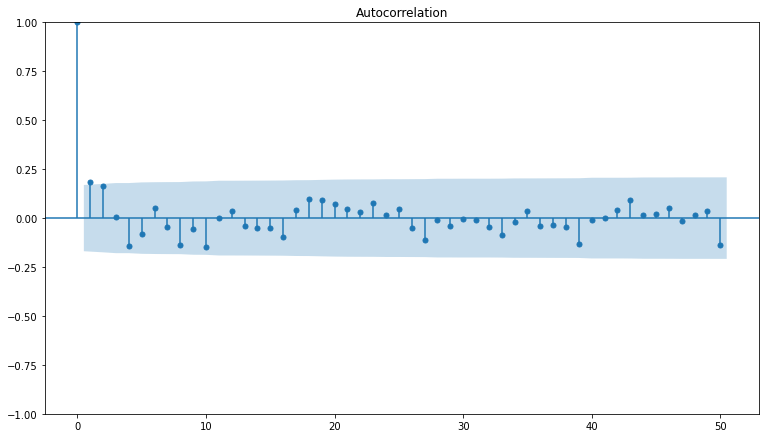

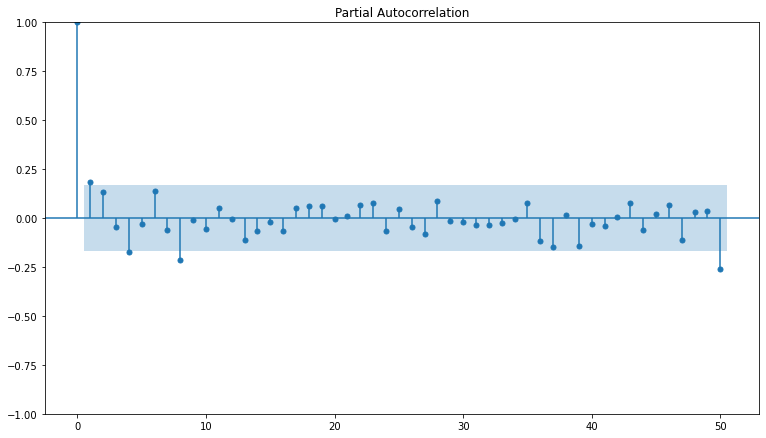

In [123]:
plot_acf(df_Inflation['Inflation_rate_diff'],lags=50)
plot_pacf(df_Inflation['Inflation_rate_diff'],lags=50)

### The arima model can be split up into AR(p), I(d) and MA(q). In the PACF graph, we can see two significant lags within the first 5 lags, making the AR equal to 2. In the ACF graph, we also see one significant lag, making the MA equal to 1. The I or differencing term in the arima model is equal to 1 since we did one level of differencing to make the data stationary. This makes our model ARIMA(2,1,1). Next, we build the model based on these specifications.

In [124]:
train = df_Inflation.loc[:106]
test = df_Inflation.loc[107:]

In [125]:
train

,DATE,Inflation rate,DateIndex,Inflation_rate_diff
1,1989-06-30,0.15832,1,0.00964
2,1989-09-30,0.15350,2,-0.00482
3,1989-12-31,0.16512,3,0.01162
4,1990-03-31,0.17514,4,0.01002
5,1990-06-30,0.20136,5,0.02622
...,...,...,...,...
102,2014-09-30,0.04369,102,-0.00793
103,2014-12-31,0.02807,103,-0.01562
104,2015-03-31,0.00303,104,-0.02504
105,2015-06-30,-0.00050,105,-0.00353


In [126]:
test

,DATE,Inflation rate,DateIndex,Inflation_rate_diff
107,2015-12-31,0.00202,107,0.00173
108,2016-03-31,0.01039,108,0.00837
109,2016-06-30,0.01054,109,0.00015
110,2016-09-30,0.02178,110,0.01124
111,2016-12-31,0.03633,111,0.01455
112,2017-03-31,0.06429,112,0.02796
113,2017-06-30,0.08230,113,0.01801
114,2017-09-30,0.08449,114,0.00219
115,2017-12-31,0.09066,115,0.00617
116,2018-03-31,0.08155,116,-0.00911


In [127]:
model = ARIMA(train['Inflation rate'], order = (2, 1, 1))
results = model.fit()

C:\Users\Students\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Students\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Students\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [128]:
prediction = results.predict(start=106, end=133, dynamic=False)
prediction.columns = ["predicted_values"]
test["predicted_values"] = prediction

C:\Users\Students\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Students\AppData\Local\Temp\ipykernel_10972\2371923517.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predicted_values"] = prediction


In [129]:
test

,DATE,Inflation rate,DateIndex,Inflation_rate_diff,predicted_values
107,2015-12-31,0.00202,107,0.00173,2.116377e-04
108,2016-03-31,0.01039,108,0.00837,-1.500782e-04
109,2016-06-30,0.01054,109,0.00015,1.445867e-04
110,2016-09-30,0.02178,110,0.01124,-9.480576e-05
111,2016-12-31,0.03633,111,0.01455,9.979825e-05
112,2017-03-31,0.06429,112,0.02796,-5.837611e-05
113,2017-06-30,0.08230,113,0.01801,7.019191e-05
114,2017-09-30,0.08449,114,0.00219,-3.431068e-05
115,2017-12-31,0.09066,115,0.00617,5.063118e-05
116,2018-03-31,0.08155,116,-0.00911,-1.841129e-05


In [130]:
test = test.dropna()
test

,DATE,Inflation rate,DateIndex,Inflation_rate_diff,predicted_values
107,2015-12-31,0.00202,107,0.00173,2.116377e-04
108,2016-03-31,0.01039,108,0.00837,-1.500782e-04
109,2016-06-30,0.01054,109,0.00015,1.445867e-04
110,2016-09-30,0.02178,110,0.01124,-9.480576e-05
111,2016-12-31,0.03633,111,0.01455,9.979825e-05
112,2017-03-31,0.06429,112,0.02796,-5.837611e-05
113,2017-06-30,0.08230,113,0.01801,7.019191e-05
114,2017-09-30,0.08449,114,0.00219,-3.431068e-05
115,2017-12-31,0.09066,115,0.00617,5.063118e-05
116,2018-03-31,0.08155,116,-0.00911,-1.841129e-05


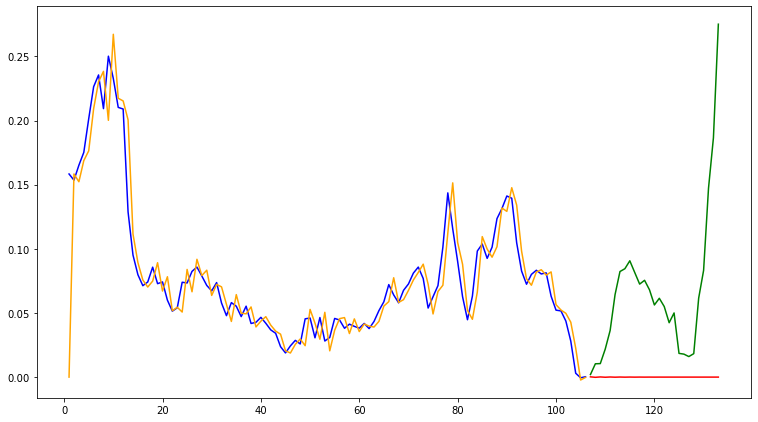

In [131]:
plt.plot(train['Inflation rate'], color = 'Blue', label = "Train")
plt.plot(test['Inflation rate'], color = 'Green', label = "Test")
plt.plot(test['predicted_values'], color ='Red', label = "Prediction")
plt.plot(results.fittedvalues, color='Orange')

In [132]:
MAPE_test=metrics.mean_squared_error(test['Inflation rate'], test['predicted_values'])
MAPE_train=metrics.mean_absolute_percentage_error(train['Inflation rate'], results.fittedvalues)
print("The MAPE for Model Accuracy(test) is",MAPE_test)
print("The MAPE for Model fit(train) is",MAPE_train)

The MAPE for Model Accuracy(test) is 0.007734497881513715
The MAPE for Model fit(train) is 0.2702124385534399


### The predicted values are not able to identify the curves in the graph and are graphed as more of a straight line. The MAPE for model fit is low showing that it is able to fit to the train data well. We can see that the data is not able to predict the test values accurately.  

## Among the Holt's, Damped, simple regression, and ARIMA,  ARIMA model performed better. So we now forecast the Interest rate for next two quarter using ARIMA model.

# Model Predictions for next two quarters

In [133]:
model = ARIMA(df_Inflation['Inflation rate'], order = (2, 1, 1))
results = model.fit()

C:\Users\Students\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Students\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Students\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [134]:
prediction = results.predict(start=106, end=135, dynamic=False)

C:\Users\Students\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [135]:
prediction

106    0.000419
107    0.002415
108    0.011952
109    0.011857
110    0.023355
111    0.040420
112    0.070687
113    0.089248
114    0.087054
115    0.091624
116    0.081112
117    0.069482
118    0.074731
119    0.067564
120    0.053125
121    0.060568
122    0.055086
123    0.039237
124    0.049388
125    0.015082
126    0.012571
127    0.016443
128    0.018227
129    0.068729
130    0.093371
131    0.159590
132    0.202534
133    0.293598
134    0.201318
135    0.187467
Name: predicted_mean, dtype: float64